In [1]:
import os
# os.chdir("/content/drive/MyDrive/Sohila")
import pandas as pd
final_df=pd.read_csv('compounds_descriptors_pIC50.csv')
final_df.head()

,target_pref_name,molecule_chembl_id,canonical_smiles,pIC50
0,SARS coronavirus 3C-like proteinase,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668
1,SARS coronavirus 3C-like proteinase,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,5.026872
2,SARS coronavirus 3C-like proteinase,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,4.869666
3,SARS coronavirus 3C-like proteinase,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,4.882397
4,SARS coronavirus 3C-like proteinase,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],5.698970


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

# Define the input CSV file
input_csv = 'compounds_descriptors_pIC50.csv'  # Replace with your actual file path

# Load the CSV file
data = pd.read_csv(input_csv)

# Ensure the file contains the required column
if 'canonical_smiles' not in data.columns:
    raise ValueError("The CSV file must contain a 'canonical_smiles' column.")

# Convert SMILES strings to RDKit molecule objects
data['molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

# Filter out invalid molecules
data = data[data['molecule'].notnull()]

# Function to calculate molecular descriptors
def calculate_descriptors(molecule):
    # Calculate molecular weight, LogP, etc.
    descriptors = {
        'MolWt': Descriptors.MolWt(molecule),
        'LogP': Descriptors.MolLogP(molecule),
        'NumHDonors': Descriptors.NumHDonors(molecule),
        'NumHAcceptors': Descriptors.NumHAcceptors(molecule)
    }
    return pd.Series(descriptors)

# Apply the descriptor calculation
descriptors_df = data['molecule'].apply(calculate_descriptors)

# Calculate Morgan Fingerprints
data['fingerprints'] = data['molecule'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024)
)


final_df = pd.concat([data.reset_index(drop=True), descriptors_df], axis=1)


output_csv = 'output_with_descriptors.csv'
final_df.to_csv(output_csv, index=False)

# Preview the final data
print(final_df.head())


                      target_pref_name molecule_chembl_id  \
0  SARS coronavirus 3C-like proteinase       CHEMBL187579   
1  SARS coronavirus 3C-like proteinase       CHEMBL188487   
2  SARS coronavirus 3C-like proteinase       CHEMBL185698   
3  SARS coronavirus 3C-like proteinase       CHEMBL426082   
4  SARS coronavirus 3C-like proteinase       CHEMBL187717   

                                  canonical_smiles     pIC50  \
0           Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21  5.142668   
1           O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21  5.026872   
2          O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21  4.869666   
3              O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21  4.882397   
4  O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]  5.698970   

                                            molecule  \
0  <rdkit.Chem.rdchem.Mol object at 0x000002031B1...   
1  <rdkit.Chem.rdchem.Mol object at 0x000002031B1...   
2  <rdkit.Chem.rdchem.Mol object at 0x000002031B1...   
3  <rdkit.Chem.rdchem.Mo

In [3]:
final_df=pd.read_csv('output_with_descriptors.csv')
final_df.head()

,target_pref_name,molecule_chembl_id,canonical_smiles,pIC50,molecule,fingerprints,MolWt,LogP,NumHDonors,NumHAcceptors
0,SARS coronavirus 3C-like proteinase,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,<rdkit.Chem.rdchem.Mol object at 0x000002031B1...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,281.271,1.89262,0.0,5.0
1,SARS coronavirus 3C-like proteinase,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,5.026872,<rdkit.Chem.rdchem.Mol object at 0x000002031B1...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,415.589,3.81320,0.0,2.0
2,SARS coronavirus 3C-like proteinase,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,4.869666,<rdkit.Chem.rdchem.Mol object at 0x000002031B1...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,421.190,2.66050,0.0,4.0
3,SARS coronavirus 3C-like proteinase,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,4.882397,<rdkit.Chem.rdchem.Mol object at 0x000002031B1...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,293.347,3.63080,0.0,3.0
4,SARS coronavirus 3C-like proteinase,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],5.698970,<rdkit.Chem.rdchem.Mol object at 0x000002031B1...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,338.344,3.53900,0.0,5.0


In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem


final_df['molecule'] = final_df['canonical_smiles'].apply(Chem.MolFromSmiles)

final_df['fingerprints'] = final_df['molecule'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=1024)
)


In [5]:
import pandas as pd

# Convert ExplicitBitVect to binary features
fingerprints_df = final_df['fingerprints'].apply(
    lambda x: pd.Series(list(map(int, x.ToBitString())))
)


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [7]:
# Encode the target_pref_name to numerical values
label_encoder = LabelEncoder()
final_df['target_pref_name_encoded'] = label_encoder.fit_transform(final_df['target_pref_name'])

# Display the encoded target_pref_name
print(final_df[['target_pref_name', 'target_pref_name_encoded']].head())

                      target_pref_name  target_pref_name_encoded
0  SARS coronavirus 3C-like proteinase                         1
1  SARS coronavirus 3C-like proteinase                         1
2  SARS coronavirus 3C-like proteinase                         1
3  SARS coronavirus 3C-like proteinase                         1
4  SARS coronavirus 3C-like proteinase                         1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set the style for seaborn
sns.set(style="whitegrid")

In [9]:
# Select features for clustering
features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']  # Add or remove features as needed
X = final_df[features]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3017320396930927, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49186484829863275, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2499359275090569, tolerance: 0.20769731858053253
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conver

Selected features: Index(['NumHAcceptors', '5', '13', '19', '21', '25', '27', '29', '32', '36',
       ...
       '999', '1000', '1003', '1005', '1007', '1008', '1010', '1017', '1019',
       '1023'],
      dtype='object', length=363)


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42            │ (None, 363)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_85 (Dense)          │ (None, 256)            │         93,184 │ input_layer_42[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_85    │ (None, 256)            │          1,024 │ dense_85[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_85 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_86 (Dense)          │ (None, 128)            │         32,896 │ dropout_85[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_86    │ (None, 128)            │            512 │ dense_86[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_86 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression (Dense)        │ (None, 1)              │            129 │ dropout_86[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 1)              │            129 │ dropout_86[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 127,874 (499.51 KB)

 Trainable params: 127,106 (496.51 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - classification_accuracy: 0.5016 - classification_loss: 0.9904 - loss: 42.8032 - regression_loss: 37.1031 - regression_mae: 5.7349 - val_classification_accuracy: 0.5429 - val_classification_loss: 0.7400 - val_loss: 42.8218 - val_regression_loss: 37.1071 - val_regression_mae: 5.9812 - learning_rate: 1.0000e-04
Epoch 2/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.4916 - classification_loss: 1.0104 - loss: 41.5695 - regression_loss: 35.8623 - regression_mae: 5.6792 - val_classification_accuracy: 0.5291 - val_classification_loss: 0.7405 - val_loss: 38.1180 - val_regression_loss: 32.4609 - val_regression_mae: 5.5860 - learning_rate: 1.0000e-04
Epoch 3/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.5292 - classification_loss: 0.9527 - loss: 40.2622 - regression_loss: 34.6228 - regression_mae: 5.5778 - val_classification_accuracy: 0.5457 - val_classification_loss: 0.7359 - val_loss: 35.190

Training Time: 205.35 seconds (3.42 minutes)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


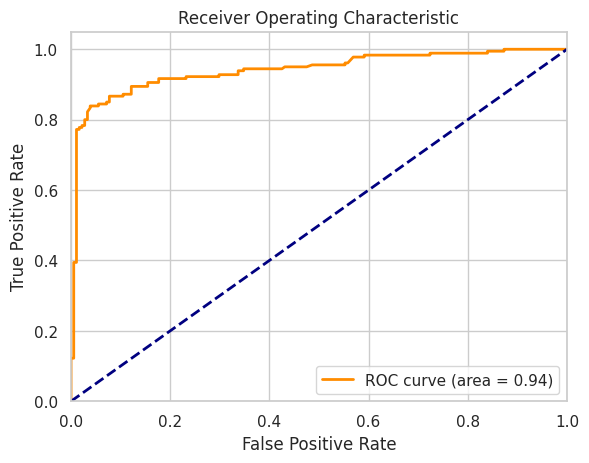

Algorithm: Multi-Tasking Neural Network
                      Metric  Validation
0            Regression Loss    0.303728
1             Regression MAE    0.401997
2              Regression R²    0.771668
3             Regression MSE    0.303376
4            Regression RMSE    0.550796
5        Classification Loss    0.418983
6    Classification Accuracy    0.889197
7          Classification F1    0.886364
8   Classification Precision    0.906977
9      Classification Recall    0.866667
10        Classification AUC    0.940378


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LassoCV
import joblib
import numpy as np
import matplotlib.pyplot as plt
import time  # For measuring training time
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
# Assume final_df and fingerprints_df are already defined
# Prepare feature matrix (X) and target vector (y)
X = pd.concat([final_df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']], fingerprints_df], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

y = final_df['pIC50']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Feature selection using LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", selected_features)
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]
#X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Separate regression and classification targets
y_reg_train = y_train
y_reg_val = y_val
y_class_train = (y_train > y_train.median()).astype(int)  # Example binary classification
y_class_val = (y_val > y_val.median()).astype(int)

# Define the input layer
input_layer = layers.Input(shape=(X_train.shape[1],))

# Shared base network
#x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
#x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.5)(x)
#x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
#x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)  # Reduced dropout for better training stability

x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)



# Regression head
regression_output = layers.Dense(1, name='regression')(x)

# Classification head
classification_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

# Define the model
model = models.Model(inputs=input_layer, outputs=[regression_output, classification_output])

# Compile the model with a learning rate schedule
model.compile(tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.001),
              loss={'regression': 'mse', 'classification': 'binary_crossentropy'},
              metrics={'regression': ['mae'], 'classification': ['accuracy']})
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

# Summary of the model
model.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)





# Record start time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    {'regression': y_reg_train, 'classification': y_class_train},
                    validation_data=(X_val, {'regression': y_reg_val, 'classification': y_class_val}),
                    epochs=600,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Record end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Save the model
model.save('multi_tasking_model1.h5')  # Save the model in HDF5 format

# Evaluate the model on validation data
val_results = model.evaluate(X_val, {'regression': y_reg_val, 'classification': y_class_val}, verbose=0)

# Predict regression and classification values
y_reg_pred_val = model.predict(X_val)[0]
y_class_pred_val = (model.predict(X_val)[1] > 0.5).astype("int32")
y_class_pred_prob = model.predict(X_val)[1]

# Calculate R² for regression
r2_val = r2_score(y_reg_val, y_reg_pred_val)
# Calculate MSE and RMSE for regression
mse_val = mean_squared_error(y_reg_val, y_reg_pred_val)
rmse_val = np.sqrt(mse_val)

# Calculate classification metrics
f1_val = f1_score(y_class_val, y_class_pred_val)
precision_val = precision_score(y_class_val, y_class_pred_val)
recall_val = recall_score(y_class_val, y_class_pred_val)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_class_val, y_class_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Regression Loss', 'Regression MAE', 'Regression R²', 'Regression MSE', 'Regression RMSE',
               'Classification Loss', 'Classification Accuracy', 'Classification F1', 'Classification Precision', 'Classification Recall', 'Classification AUC'],
    'Validation': [val_results[1], val_results[4], r2_val, mse_val, rmse_val,
                   val_results[2], val_results[3], f1_val, precision_val, recall_val, roc_auc]
})

print("Algorithm: Multi-Tasking Neural Network")
print(results_df)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, auc
import joblib
import numpy as np
import time
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Assume final_df and fingerprints_df are already defined
# Prepare feature matrix (X) and target vector (y)
X = pd.concat([final_df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']], fingerprints_df], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

y = final_df['pIC50']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", selected_features)
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Save the scaler and selected features
joblib.dump(scaler, 'scaler.pkl')
selected_features_list = selected_features.tolist()
joblib.dump(selected_features_list, 'selected_features.pkl')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Separate regression and classification targets
y_reg_train = y_train
y_reg_val = y_val
y_class_train = (y_train > y_train.median()).astype(int)
y_class_val = (y_val > y_val.median()).astype(int)

# Define the input layer
input_layer = layers.Input(shape=(X_train.shape[1],))

# Shared base network
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

# Regression head
regression_output = layers.Dense(1, name='regression')(x)

# Classification head
classification_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

# Define the model
model = models.Model(inputs=input_layer, outputs=[regression_output, classification_output])

# Compile the model with a learning rate schedule
model.compile(tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.001),
              loss={'regression': 'mse', 'classification': 'binary_crossentropy'},
              metrics={'regression': ['mae'], 'classification': ['accuracy']})

# Summary of the model
model.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Record start time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    {'regression': y_reg_train, 'classification': y_class_train},
                    validation_data=(X_val, {'regression': y_reg_val, 'classification': y_class_val}),
                    epochs=600,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Record end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Save the model
model.save('multi_tasking_model1.h5')

# Evaluate the model on validation data
val_results = model.evaluate(X_val, {'regression': y_reg_val, 'classification': y_class_val}, verbose=0)

# Predict regression and classification values
y_reg_pred_val = model.predict(X_val)[0]
y_class_pred_val = (model.predict(X_val)[1] > 0.5).astype("int32")
y_class_pred_prob = model.predict(X_val)[1]

# Calculate and print evaluation metrics
print(f"Validation Regression Loss: {val_results[1]}")
print(f"Validation Regression MAE: {val_results[4]}")
print(f"Validation Regression R²: {r2_score(y_reg_val, y_reg_pred_val)}")
print(f"Validation Classification Loss: {val_results[2]}")
print(f"Validation Classification Accuracy: {val_results[3]}")
print(f"Validation Classification F1: {f1_score(y_class_val, y_class_pred_val)}")
print(f"Validation Classification Precision: {precision_score(y_class_val, y_class_pred_val)}")
print(f"Validation Classification Recall: {recall_score(y_class_val, y_class_pred_val)}")

KeyboardInterrupt: 

In [12]:
pip install tensorflow==2.17.0



  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.0 MB 2.1 MB/s eta 0:03:04
   ---------------------------------------- 0.8/385.0 MB 1.9 MB/s eta 0:03:26
   ---------------------------------------- 1.0/385.0 MB 1.8 MB/s eta 0:03:34
   ---------------------------------------- 1.6/385.0 MB 1.8 MB/s eta 0:03:31
   ---------------------------------------- 2.1/385.0 MB 1.9 MB/s eta 0:03:23
   ---------------------------------------- 2.4/385.0 MB 1.7 MB/s eta 0:03:40
   ---------------------------------------- 2.6/385.0 MB 1.8 MB/s eta 0:03:33
   ---------------------------------------- 3.4/385.0 MB 2.0 MB/s eta 0:03:16
   ---------------------------------------- 3.9/385.0 MB 2.0 MB/s eta 0:03:12
   ------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, auc
import joblib
import numpy as np
import time
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Assume final_df and fingerprints_df are already defined
# Prepare feature matrix (X) and target vector (y)
X = pd.concat([final_df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']], fingerprints_df], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

y = final_df['pIC50']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", selected_features)
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Save the scaler and selected features
joblib.dump(scaler, 'scaler.pkl')
selected_features_list = selected_features.tolist()
joblib.dump(selected_features_list, 'selected_features.pkl')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Separate regression and classification targets
y_reg_train = y_train
y_reg_val = y_val
y_class_train = (y_train > y_train.median()).astype(int)
y_class_val = (y_val > y_val.median()).astype(int)

# Define the input layer
input_layer = layers.Input(shape=(X_train.shape[1],))

# Shared base network
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

# Regression head
regression_output = layers.Dense(1, name='regression')(x)

# Classification head
classification_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

# Define the model
model = models.Model(inputs=input_layer, outputs=[regression_output, classification_output])

# Compile the model with a learning rate schedule
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.001),
              loss={'regression': tf.keras.losses.MeanSquaredError(), 'classification': tf.keras.losses.BinaryCrossentropy()},
              metrics={'regression': ['mae'], 'classification': ['accuracy']})

# Summary of the model
model.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Record start time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    {'regression': y_reg_train, 'classification': y_class_train},
                    validation_data=(X_val, {'regression': y_reg_val, 'classification': y_class_val}),
                    epochs=600,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Record end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Save the model in the HDF5 format
model.save('multi_tasking_model.h5')

# Evaluate the model on validation data
val_results = model.evaluate(X_val, {'regression': y_reg_val, 'classification': y_class_val}, verbose=0)

# Predict regression and classification values
y_reg_pred_val = model.predict(X_val)[0]
y_class_pred_val = (model.predict(X_val)[1] > 0.5).astype("int32")
y_class_pred_prob = model.predict(X_val)[1]

# Calculate and print evaluation metrics
print(f"Validation Regression Loss: {val_results[1]}")
print(f"Validation Regression MAE: {val_results[4]}")
print(f"Validation Regression R²: {r2_score(y_reg_val, y_reg_pred_val)}")
print(f"Validation Classification Loss: {val_results[2]}")
print(f"Validation Classification Accuracy: {val_results[3]}")
print(f"Validation Classification F1: {f1_score(y_class_val, y_class_pred_val)}")
print(f"Validation Classification Precision: {precision_score(y_class_val, y_class_pred_val)}")
print(f"Validation Classification Recall: {recall_score(y_class_val, y_class_pred_val)}")

c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30173203977537355, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49186484831707844, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2499359273843993, tolerance: 0.20769731858053253
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: Conve

Selected features: Index(['NumHAcceptors', '5', '13', '19', '21', '25', '27', '29', '32', '36',
       ...
       '999', '1000', '1003', '1005', '1007', '1008', '1010', '1017', '1019',
       '1023'],
      dtype='object', length=363)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 363)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     93,184 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression (Dense)  │ (None, 1)         │        129 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 1)         │        129 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 127,874 (499.51 KB)

 Trainable params: 127,106 (496.51 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - classification_accuracy: 0.4988 - classification_loss: 1.0579 - loss: 42.7694 - regression_loss: 37.0021 - regression_mae: 5.7367 - val_classification_accuracy: 0.5374 - val_classification_loss: 0.7406 - val_loss: 42.8110 - val_regression_loss: 37.0890 - val_regression_mae: 5.9789 - learning_rate: 1.0000e-04
Epoch 2/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - classification_accuracy: 0.4903 - classification_loss: 1.0172 - loss: 41.3701 - regression_loss: 35.6563 - regression_mae: 5.6650 - val_classification_accuracy: 0.5346 - val_classification_loss: 0.7373 - val_loss: 37.6266 - val_regression_loss: 31.9808 - val_regression_mae: 5.5433 - learning_rate: 1.0000e-04
Epoch 3/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - classification_accuracy: 0.5040 - classification_loss: 0.9992 - loss: 40.4522 - regression_loss: 34.7661 - regression_mae: 5.6113 - val_classification_accuracy: 0.5346 - val_classification_loss: 0.7347 - val_loss: 34.743

Training Time: 276.08 seconds (4.60 minutes)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Validation Regression Loss: 0.31213751435279846
Validation Regression MAE: 0.40409284830093384
Validation Regression R²: 0.760822406668647
Validation Classification Loss: 0.42322400212287903
Validation Classification Accuracy: 0.8891966938972473
Validation Classification F1: 0.8863636363636364
Validation Classification Precision: 0.9069767441860465
Validation Classification Recall: 0.8666666666666667


In [14]:
# training.py
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import joblib
import numpy as np
import time
import random

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Assume final_df and fingerprints_df are already defined
# Prepare feature matrix (X) and target vector (y)
X = pd.concat([final_df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']], fingerprints_df], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

y = final_df['pIC50']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", selected_features)
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Save the scaler and selected features
joblib.dump(scaler, 'scaler.pkl')
selected_features_list = selected_features.tolist()
joblib.dump(selected_features_list, 'selected_features.pkl')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Separate regression and classification targets
y_reg_train = y_train
y_reg_val = y_val
y_class_train = (y_train > y_train.median()).astype(int)
y_class_val = (y_val > y_val.median()).astype(int)

# Define the input layer
input_layer = layers.Input(shape=(X_train.shape[1],))

# Shared base network
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)  # Functional API for Dropout
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

# Regression head
regression_output = layers.Dense(1, name='regression')(x)

# Classification head
classification_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

# Define the model
model = models.Model(inputs=input_layer, outputs=[regression_output, classification_output])

# Compile the model with loss functions as strings
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.001),
              loss={'regression': 'mean_squared_error', 'classification': 'binary_crossentropy'},
              metrics={'regression': ['mae'], 'classification': ['accuracy']})

# Summary of the model
model.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Record start time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    {'regression': y_reg_train, 'classification': y_class_train},
                    validation_data=(X_val, {'regression': y_reg_val, 'classification': y_class_val}),
                    epochs=600,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Record end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Save the model in the SavedModel format
model.save('multi_tasking_model')  # Automatically uses SavedModel format


# Evaluate the model on validation data
val_results = model.evaluate(X_val, {'regression': y_reg_val, 'classification': y_class_val}, verbose=0)

# Print validation metrics
print(f"Validation Regression Loss: {val_results[1]}")
print(f"Validation Regression MAE: {val_results[4]}")
print(f"Validation Regression R²: {r2_score(y_reg_val, model.predict(X_val)[0])}")


c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30173203977537355, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49186484831707844, tolerance: 0.1872484459501721
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2499359273843993, tolerance: 0.20769731858053253
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\MK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: Conve

Selected features: Index(['NumHAcceptors', '5', '13', '19', '21', '25', '27', '29', '32', '36',
       ...
       '999', '1000', '1003', '1005', '1007', '1008', '1010', '1017', '1019',
       '1023'],
      dtype='object', length=363)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 363)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │     93,184 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     32,896 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression (Dense)  │ (None, 1)         │        129 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 1)         │        129 │ dropout_7[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 127,874 (499.51 KB)

 Trainable params: 127,106 (496.51 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - classification_accuracy: 0.4988 - classification_loss: 1.0579 - loss: 42.7694 - regression_loss: 37.0021 - regression_mae: 5.7367 - val_classification_accuracy: 0.5374 - val_classification_loss: 0.7406 - val_loss: 42.8110 - val_regression_loss: 37.0890 - val_regression_mae: 5.9789 - learning_rate: 1.0000e-04
Epoch 2/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - classification_accuracy: 0.4903 - classification_loss: 1.0172 - loss: 41.3701 - regression_loss: 35.6563 - regression_mae: 5.6650 - val_classification_accuracy: 0.5346 - val_classification_loss: 0.7373 - val_loss: 37.6266 - val_regression_loss: 31.9808 - val_regression_mae: 5.5433 - learning_rate: 1.0000e-04
Epoch 3/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - classification_accuracy: 0.5040 - classification_loss: 0.9992 - loss: 40.4522 - regression_loss: 34.7661 - regression_mae: 5.6113 - val_classification_accuracy: 0.5346 - val_classification_loss: 0.7347 - val_loss: 34.7

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=multi_tasking_model.

In [16]:
import tensorflow as tf

# Load the HDF5 model
model = tf.keras.models.load_model('multi_tasking_model.h5')

# Save the model in the SavedModel format
model.export('multi_tasking_model_converted')  # Use export for SavedModel


INFO:tensorflow:Assets written to: multi_tasking_model_converted\assets


INFO:tensorflow:Assets written to: multi_tasking_model_converted\assets


Saved artifact at 'multi_tasking_model_converted'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 363), dtype=tf.float32, name='input_layer')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2212810753040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810764176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810766864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810752272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810753232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810756496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810767248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810767824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810757456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2212810752080: TensorSpec(shape=()

In [18]:
import os

print("Current working directory:", os.getcwd())
print("Contents of multi_tasking_model:", os.listdir('multi_tasking_model_converted'))


Current working directory: c:\Users\MK\Desktop\Multi
Contents of multi_tasking_model: ['assets', 'fingerprint.pb', 'saved_model.pb', 'variables']


In [1]:
import sys
print("Python version:", sys.version)
print("System PATH:", sys.path)

try:
    import joblib
    print("Joblib imported successfully!")
except ModuleNotFoundError as e:
    print("Joblib is missing:", e)

try:
    import rdkit
    print("RDKit imported successfully!")
except ModuleNotFoundError as e:
    print("RDKit is missing:", e)


Python version: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
System PATH: ['C:\\Users\\MK\\AppData\\Local\\Programs\\Microsoft VS Code', 'c:\\Users\\MK\\anaconda3\\python311.zip', 'c:\\Users\\MK\\anaconda3\\DLLs', 'c:\\Users\\MK\\anaconda3\\Lib', 'c:\\Users\\MK\\anaconda3', '', 'C:\\Users\\MK\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\MK\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\MK\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\MK\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\MK\\anaconda3\\Lib\\site-packages', 'c:\\Users\\MK\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\MK\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\MK\\anaconda3\\Lib\\site-packages\\Pythonwin']
Joblib imported successfully!
RDKit imported successfully!
